In [2]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Условие 1: 
## Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

1.1. Скачать данные по ссылке

1.2 Изучите стоимости недвижимости

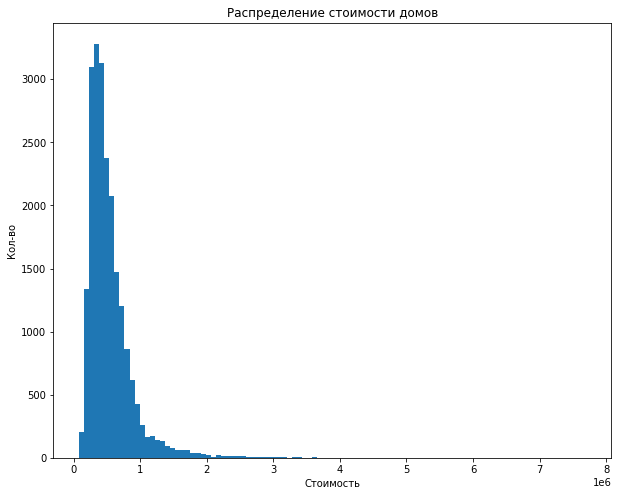

In [5]:
plt.figure(figsize=(10, 8))

plt.hist(df['price'], bins=100)

plt.title('Распределение стоимости домов')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

> Большая часть домов со стоимостью до 1млн. Все что правее выбросы или единичные очень дорогие дома.

1.3 Изучите распределение квадратуры жилой

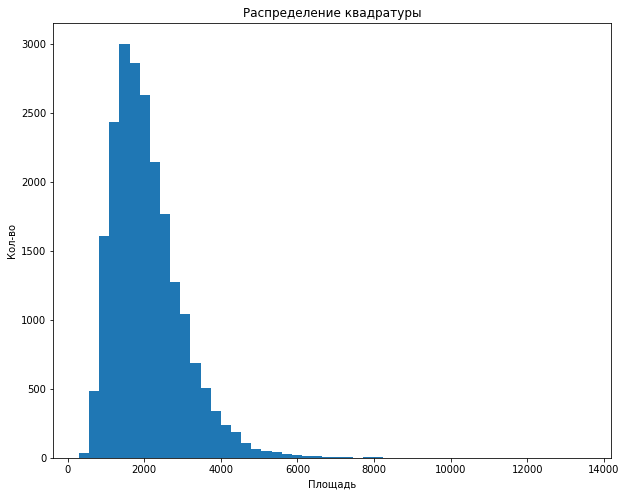

In [6]:
plt.figure(figsize=(10, 8))

plt.hist(df['sqft_living'], bins=50)

plt.title('Распределение квадратуры')
plt.xlabel('Площадь')
plt.ylabel('Кол-во');

> Большинство домов с жилой площадью до 3000~3500 кв.фт.

1.4 Изучите распределение года постройки

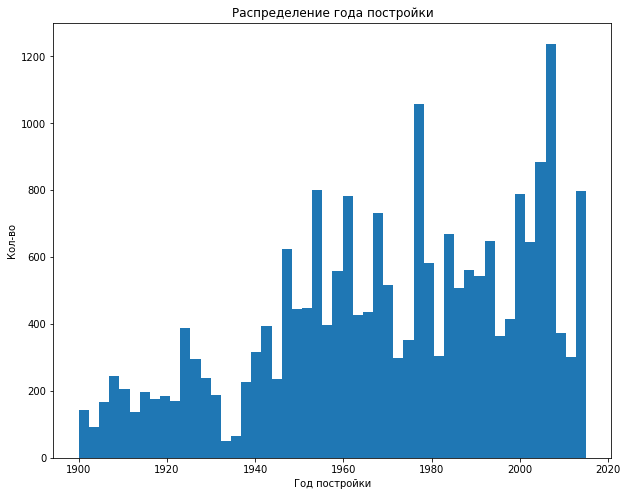

In [7]:
plt.figure(figsize=(10, 8))

plt.hist(df['yr_built'], bins=50)

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

> Основная масса домов строилась после 1940 года. В районе 1935х наблюдается резкий спад строительства (или отсутствие данных за этот период).

# Условие 2: 
## 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

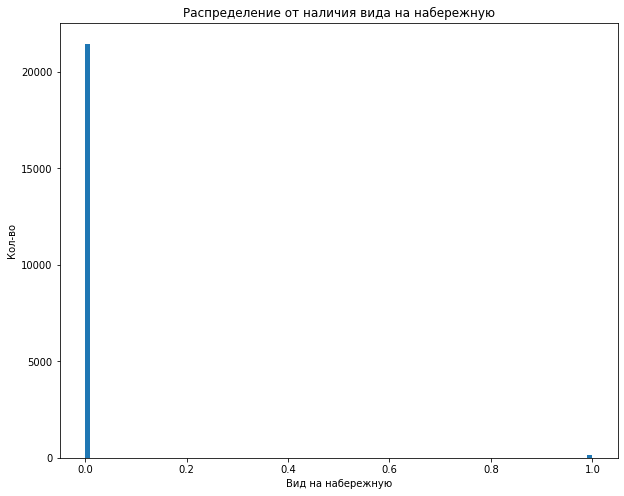

In [8]:
plt.figure(figsize=(10, 8))

plt.hist(df['waterfront'], bins=100)

plt.title('Распределение от наличия вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Кол-во');

> Подавляющее большинство не имеет вида на набережную

2.2 Изучите распределение этажей домов

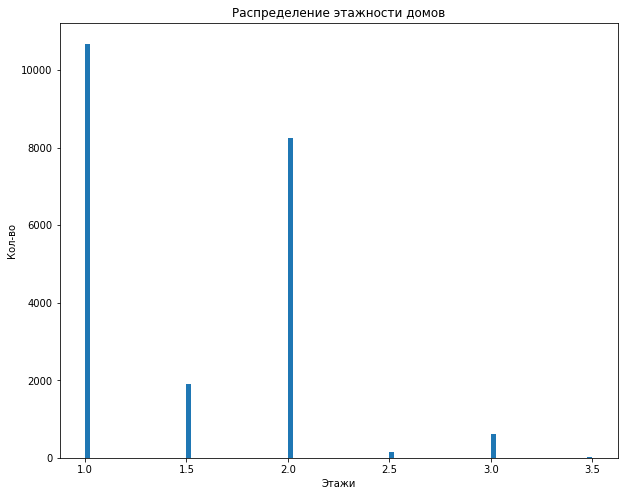

In [9]:
plt.figure(figsize=(10, 8))

plt.hist(df['floors'], bins=100)

plt.title('Распределение этажности домов')
plt.xlabel('Этажи')
plt.ylabel('Кол-во');

> Больше всего одноэтажных домов и чуть меньше двухэтажных. Далее намного меньше полутораэтажных и еще меньше трехэтажных.

2.3 Изучите распределение состояния домов

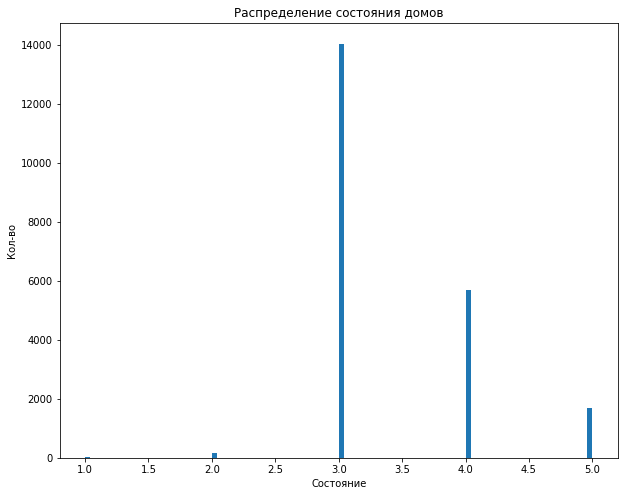

In [10]:
plt.figure(figsize=(10, 8))

plt.hist(df['condition'], bins=100)

plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Кол-во');

> Больше всего домов в среднем состоянии, чуть меньше в хорошем и довольно мало в отличном. Незначительное количество домов в плохом состоянии или с промежуточной оценкой.

# Условие 3: 
## 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [11]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


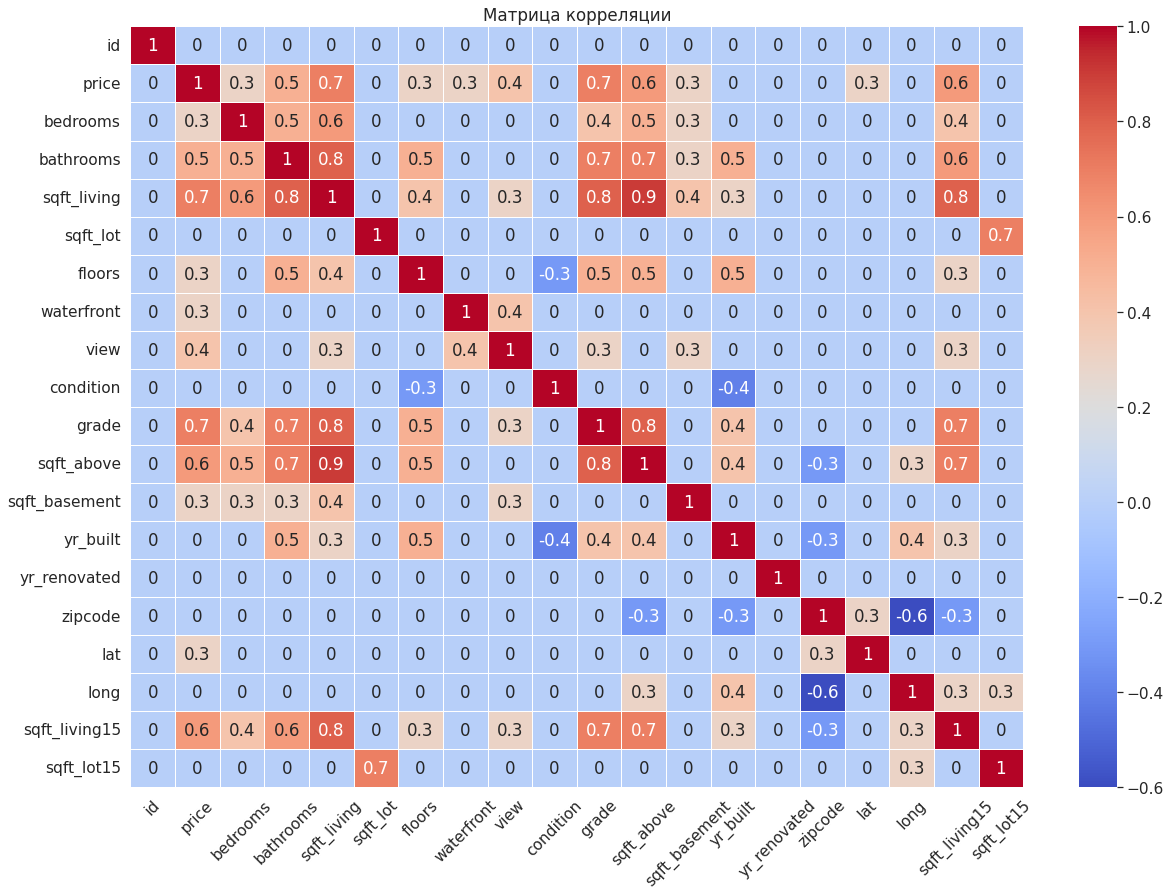

In [12]:
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.xticks(rotation = 45);

> Стоимость имеет большую взаимосвязь с 

- жилая площадь (0.7)
- оценка (0.7)
- площадь над землей (0.6)
- Кол-во ванных комнат (0.5)
- вид (0.4)


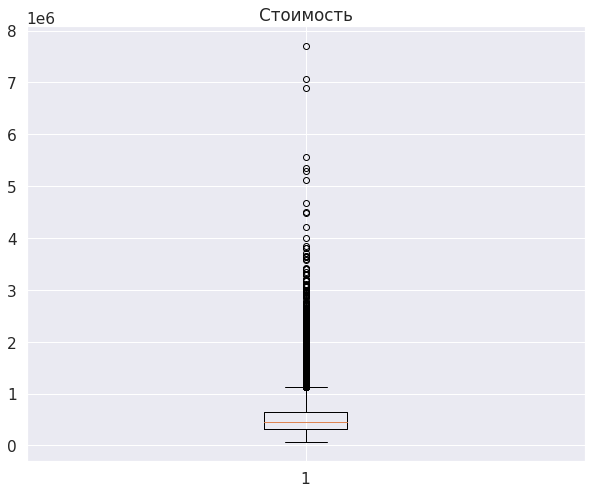

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Стоимость')
plt.boxplot(x=df['price']);

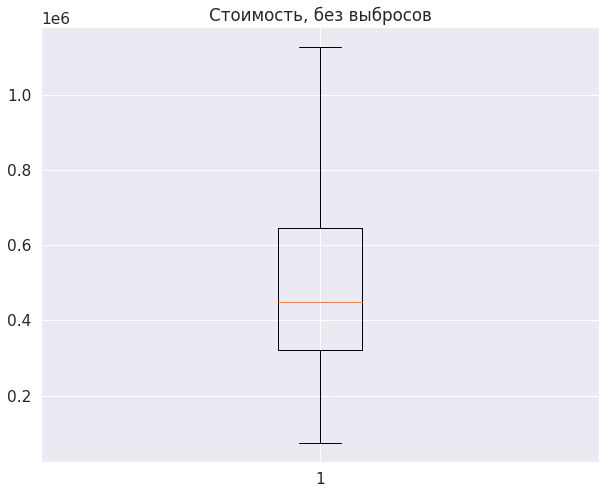

In [14]:
plt.figure(figsize=(10, 8))
plt.title('Стоимость, без выбросов')
plt.boxplot(x=df['price'], showfliers=False);

> Медианная цена в районе 450тыс. От 25% до 75% цен находятся в диапазоне от 320тыс и до 650тыс.

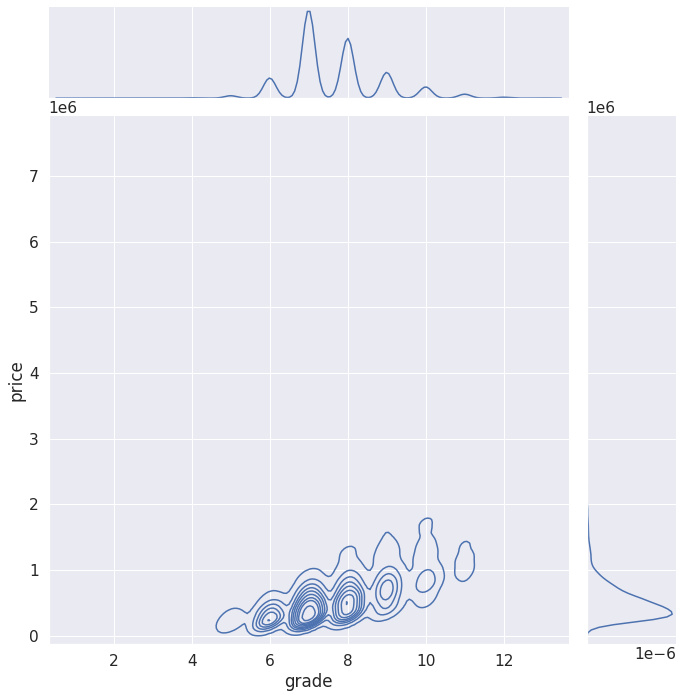

In [15]:
kde = sns.jointplot(x=df['grade'], y=df['price'], kind='kde', height=10);

> Больше домов имеют оценки 7 и 8, а так же стоимость увеличивается с увеличением оценки.

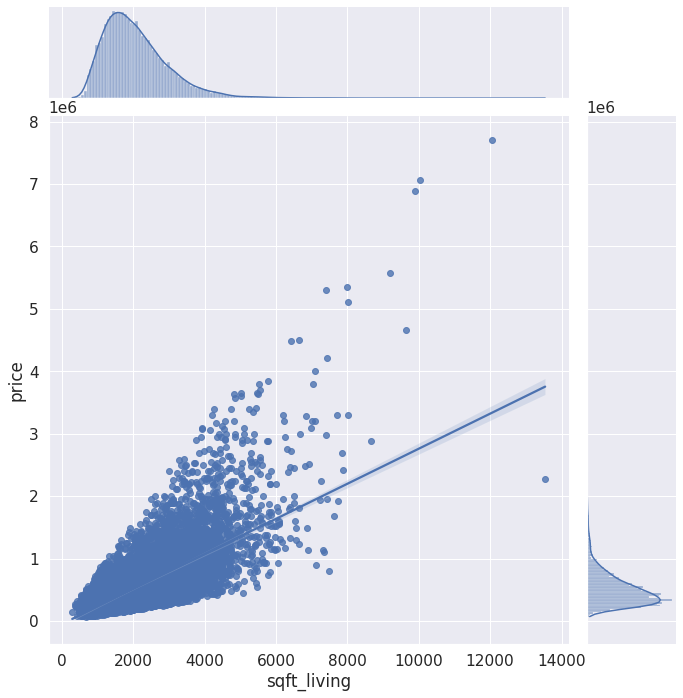

In [17]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg', height=10);

> С ростом жилой площади растет и цена.